Classification Algorithms
- Random Forest
- Naive Bayes Classifier
- Decisioin Tree Classifier

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Discover and visualise the data

In [2]:
# define the header for each columns
columns_name = [
                "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type"
            ]

# read data from csv file
df = pd.read_csv('CoverTypeSJ.csv', names = columns_name)

# display the first 5 rows of data
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# check the shape of the dataframe
df.shape

(581012, 55)

#### Findings:

(1) Based on the Pandas .shape property, it shows this dataframe contains 581012 rows and 55 columns(including target column).

In [4]:
# display all columns and their data types 
# and check whether each column contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

#### Findings:

(1) We use Pandas dataframe.info () function gives a summary of this dataframe which shows that this dataframe has 55 columns(including target column), each column has 851012 rows, each column has no null value and each column's datatype is int64.

In [5]:
# view some basic statistical details of this dataframe
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#### Findings:

(1) Wilderness_Area and Soil_Type are in the one hot encoded already so both of them could be used to do analysis.

(2) Vertical_Distance_To_Hydrology exists a negative value (-173.00), which means that chi-sq could not be used for some tests.

In [6]:
# print out the skewness of each features

print('Skewness of all the features: ')
skewness = df.skew()
print(skewness)

Skewness of all the features: 
Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area_1                       0.205618
Wilderness_Area_2                       4.061595
Wilderness_Area_3                       0.257822
Wilderness_Area_4                       3.575561
Soil_Type_1                            13.736670
Soil_Type_2                             8.615358
Soil_Type_3                            10.838630
Soil_Type_4                             6.625176
Soil_Type_5                            18.995243
Soil_Type_6                           

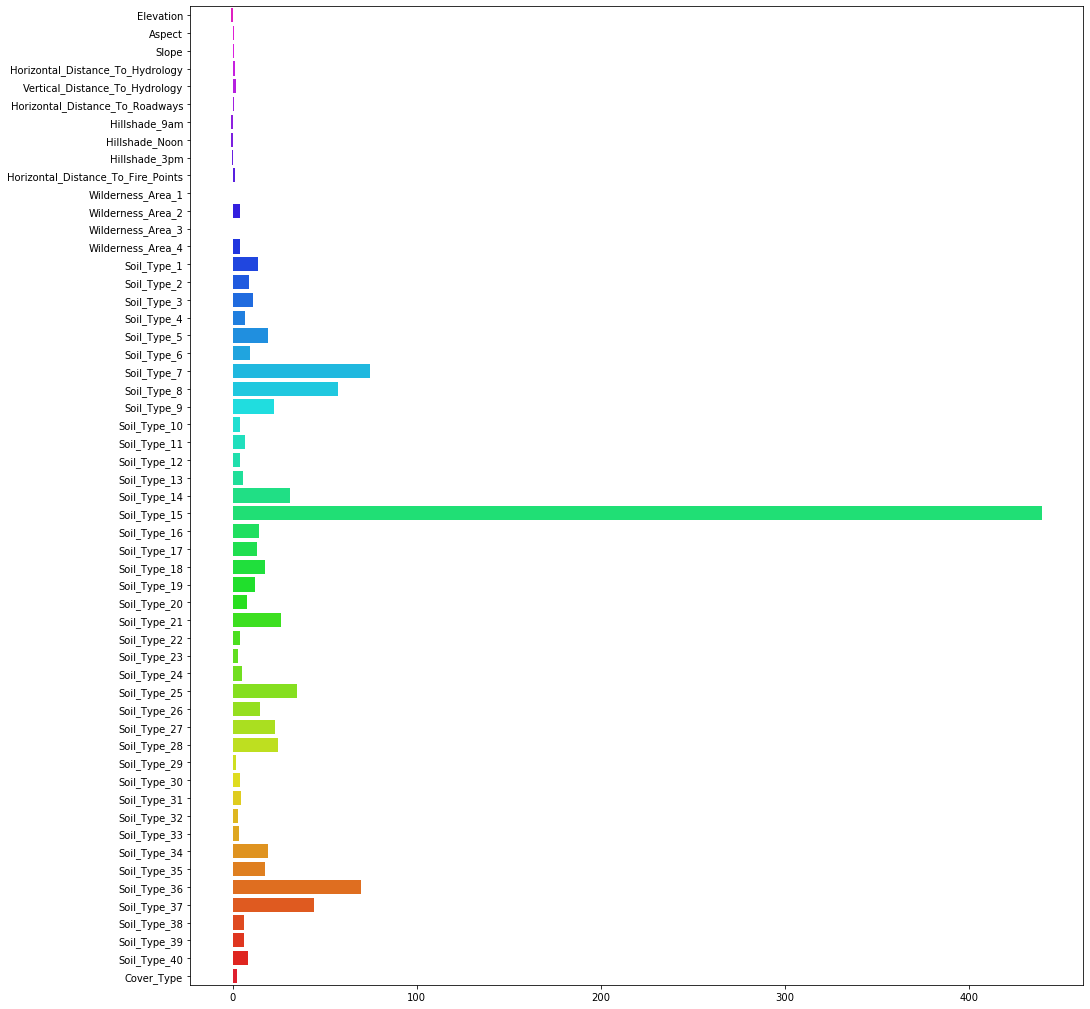

In [7]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=df.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

#### Findings:

(1) Many Soil_Type have the extreme right skewed, especially the Soil_Type_15.

(2) The feature 'Hillshade_9am' and 'Hillshade_Noon' have the extreme left skewed which score -1.18 and -1.06 respectively.

In [8]:
#  returns the correlation matrix of the dataframe
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


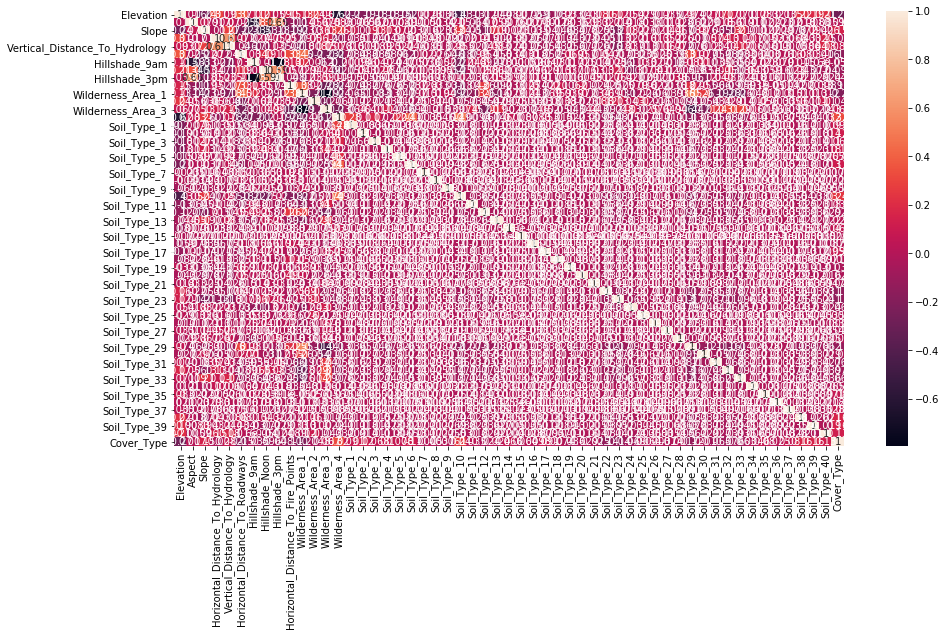

In [9]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(15,8))

# using heapmap to plot
sns.heatmap(df.corr(), annot=True)

# show the plot
plt.show()

That looks abit cranked up for a correlation chart. Hence, we will reduce the number of attributes to just soil_types against the cover_type

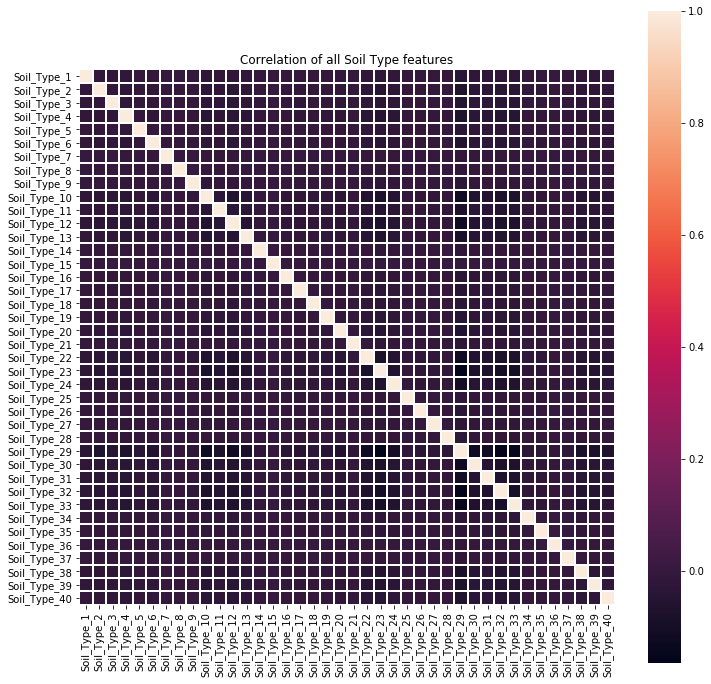

In [10]:
# get and store all the Soil Type features
columns = [cols for cols in df.columns if str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(df[columns].corr(), square=True, linewidths=1)

# set the title of the plot
plt.title('Correlation of all Soil Type features')

# show the plot
plt.show()

#### Findings:

(1) There is not any correlation between the soil_types. Hence, we try the remaining columns to see their correlations.

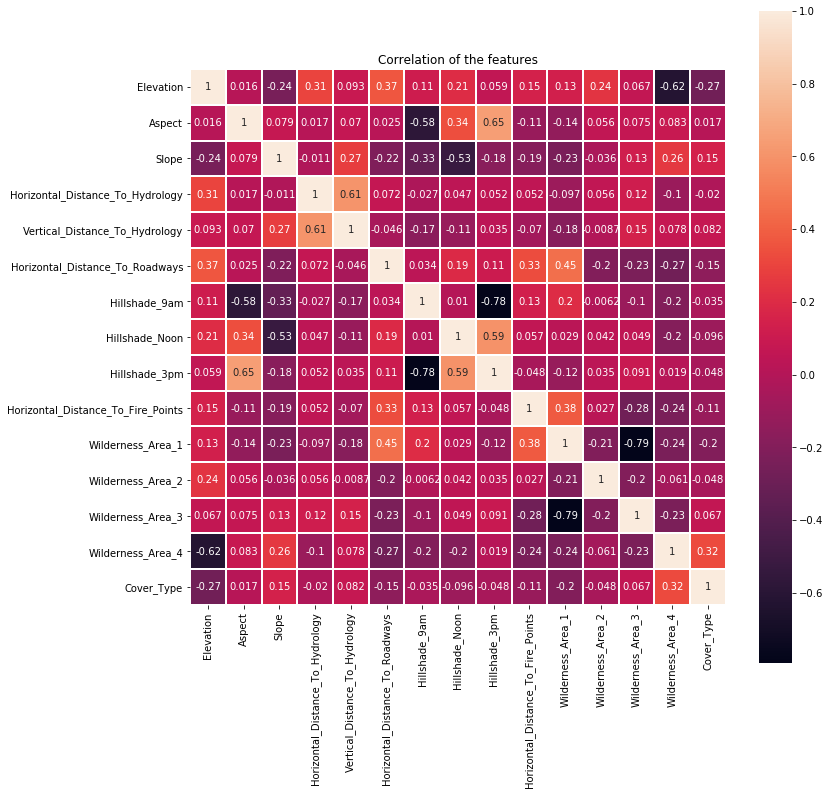

In [11]:
# get and store all the not Soil Type features
columns = [cols for cols in df.columns if not str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(df[columns].corr(), square=True, linewidths=1, annot = True)

# set the title of the plot
plt.title('Correlation of the features')

# show the plot
plt.show()

#### Findings: 

Based on above, we can notice that:

(1) Wilderness_Area_4 has a strong positive correlation with the target (Cover_Type) which gives a 0.32. Hence, it means that from Wilderness_Area_4, we can get a good information for the Cover Type.

(2) Next, Slope is second one that strong correlated with Cover Tpe which gives 0.15.

(3) The most weak correlation is Elevation which has a negative correlation with the target (Cover_Type) and it gives -0.27. Hence, it means that from Elevation, we cannot get any good information about the Cover Type.

(4) The second weak correlation is Wilderness_Area_1 which give a negative correlation -0.2.

In [12]:
# show the tota number of each cover types in this dataframe
df.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

#### Findings:

(1) We noticed that, the classes in this dataframe have no the same presence.

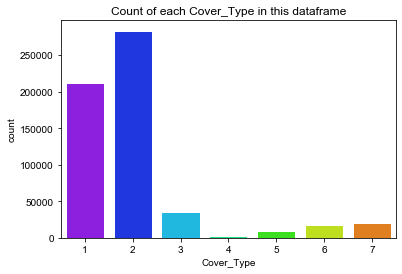

In [13]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each Cover_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=df['Cover_Type'], palette = 'gist_rainbow_r')

plt.show()

#### Findings:

(1) The most number of count of Cover Type is Cover_Type 2. Then, second more count of Cover Type is Cover_Type 1. Both informations show that Cover_Type 1 and 2 are the most common cover type in the wildness area.

(2) The least number of count of Cover Type is Cover_Type 4 which is less appear in the wildness area.

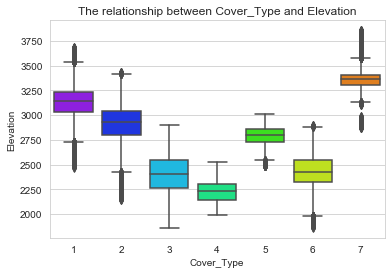

In [14]:
# Visualize the relationship between cover_type and elevation
plt.title('The relationship between Cover_Type and Elevation')
sns.boxplot(data=df, x='Cover_Type', y='Elevation', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Cover_Type 7 is in the highest elevation level which median falls around 3315. Also, it contains lower outlier falls between 2750 and 3125 and upper outlier which falls between 3500 and 3858.

(2) Comapare with other Cover Type, we notice that most of the Cover_Type 4 are in the lowest elevation level which median falls around 2250 and it does not contain any lower and upper outliers. Its minimum elevation is 2000 and max elevation is around 2600.

(3) Cover Type 3 and Cover Type 4 has no any outliers.

(4) Since all the boxes are very different from each others. Hence, the elevation is a good discriminative feature.

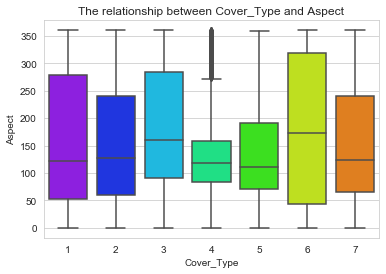

In [15]:
# Visualize the relationship between cover_type and aspect
plt.title('The relationship between Cover_Type and Aspect')
sns.boxplot(data=df, x='Cover_Type', y='Aspect', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Most of the Cover Type do not have any lower and upper outliers, except Cover Type 4 contains upper outlier which falls between 275 and 360.

(2) The median of Cover Type 1 and Cover Type 7 is the same at 125.

(3) The minimum and maximum aspect of all Cover Types are the same which is 0 and 360.

(4) Most of the Cover Type's Aspect are in the range between 60 to 240.

(5) This is a good feature since there has least number of outliers which can lead to a more accurate models

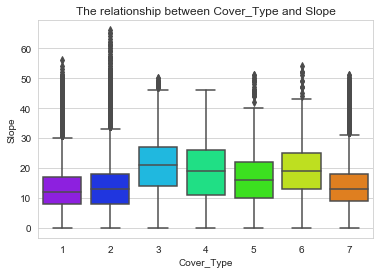

In [16]:
# Visualize the relationship between cover_type and slope
plt.title('The relationship between Cover_Type and Slope')
sns.boxplot(data=df, x='Cover_Type', y='Slope', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Most of the Cover Types have upper outliers, except Cover Type 4 do not have any outliers in its upper.

(2) Cover Type 2 has the most outliers which compare with other Cover Types and its outlier reaches to 66. It tells us that many unusual observation of Cover Type 2 is more than the maximum usual obseravation of Cover Type 2.

(3) All of the Cover Types have the same minimum slope which is 0.

(4) Cover Type 2 and Cover Type 7 have the same median which slope around 14 which tell us that 50% of their Cover Type are less than or equal to 14.

(5) 25% of the slope of Cover Type 1 and Cover Type 2 are less than or equal to 8.

(6) Cover Type 3 and Cover Type 4 have the same maximun about 46 in usual obeservation data (Cover Type).

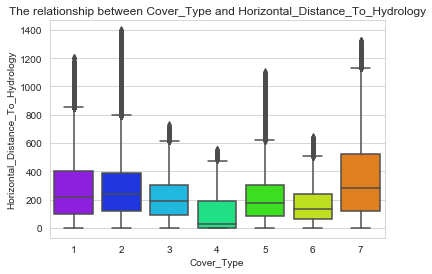

In [17]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Hydrology')
sns.boxplot(data=df, x='Cover_Type', y='Horizontal_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Most of the Cover Type of their interquartile range (25% ~ 75%) are between 0 to 400, except Cover Type 7.

(2) All the Cover Types have upper outliers, especially Cover Type 1, 2 and 5 where Cover Type 2 reaches 1397.

(3) For Cover Type 4, most of them reach 0, and its maximun value is lower than others as well as it contains the least of upper outliers.

(4) Cover Type 7 has the largest maximun value of the normal observation data which compare to the rest and it reach around 1100.

(5) Most of the Cover Type's maximun value are approximately between 500 and 650.

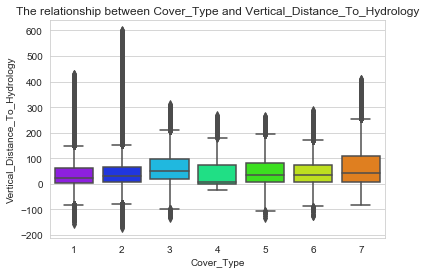

In [18]:
# Visualize the relationship between cover_type and Vertical_Distance_To_Hydrology
plt.title('The relationship between Cover_Type and Vertical_Distance_To_Hydrology')
sns.boxplot(data=df, x='Cover_Type', y='Vertical_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) 50% of most of the Cover Type of Vertical_Distance_To_Hydrology is less than or equal to 10.

(2) Cover Type 1 and Cover Type 2 contains lots of upper outliers and the largest outlier reaches 601.

(3) Cover Type 2 also has most lower outliers which reaches -173.

(4) Over the all Cover Types, we can see that the minimum Vertical_Distance_To_Hydrology of Cover Type 4 is higher than all of the Cover Type which reaches around -18.

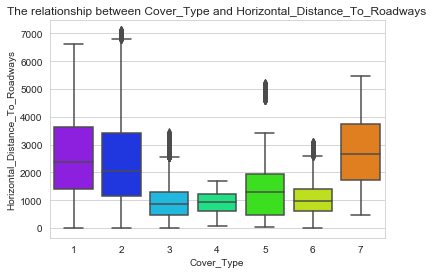

In [19]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Roadways
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Roadways')
sns.boxplot(data=df, x='Cover_Type', y='Horizontal_Distance_To_Roadways', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Cover Type 5 has a very far outliers from its normal observation data which could affect the machine learning model to do the prediction.

(2) Most of the cover types can be found nearby the roadway in the view of horizontal distance, except Cover_Type 7.

(3) Cover_Type 4 have no any outliers and its maximun value of Horizontal_Distance_To_Roadways is also the lowest one. Based on this information, we can say that most of the Cover Type 4 are nearby the roaadway in the view of Horizontal_Distance_To_Roadways which compare with others.

(4) Other than Cover Type 4, Cover Type 1 and 7 also have no any lower and upper outliers.

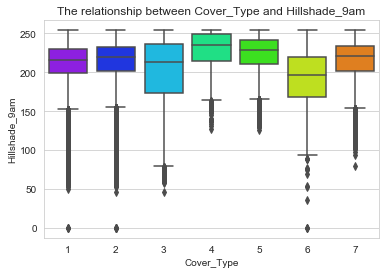

In [20]:
# Visualize the relationship between cover_type and Hillshade_9am
plt.title('The relationship between Cover_Type and Hillshade_9am')
sns.boxplot(data=df, x='Cover_Type', y='Hillshade_9am', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) As above boxplots, all the Cover Types only have lower outliers, and most of the Cover Types have the extreme outliers far from its maximun point.

(2) The Hillshade_9am has a left skew.

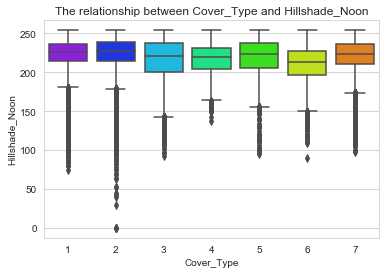

In [21]:
# Visualize the relationship between cover_type and Hillshade_Noon
plt.title('The relationship between Cover_Type and Hillshade_Noon')
sns.boxplot(data=df, x='Cover_Type', y='Hillshade_Noon', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) As above boxplots, all the Cover Types only have lower outliers, and Cover Type 2 has a extreme outlier far from its maximun value.

(2) The Hillshade_Noon has a left skew.

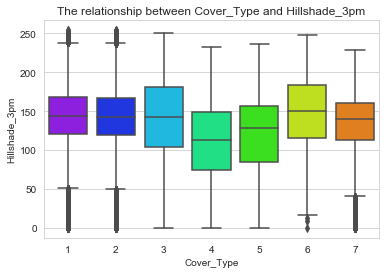

In [22]:
# Visualize the relationship between cover_type and Hillshade_3pm
plt.title('The relationship between Cover_Type and Hillshade_3pm')
sns.boxplot(data=df, x='Cover_Type', y='Hillshade_3pm', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Only Cover Type 3, 4 and 5 do not have any lower and upper outliers. Also, their minimun and maximun value are reach to 0 and near 250 respectively.

(2) Hillshade_3pm has a normal skew.

(3) Cover Type 1, 2, 3, 7 have the same median.

(4) Cover Type 1 and 2 have the upper outliers which over 250.

(5) Cover Type 4 and 5's median are lower than the average median of other Cover Types.

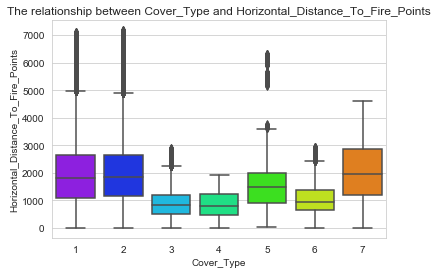

In [23]:
# Visualize the relationship between cover_type and Horizontal_Distance_To_Fire_Points
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Fire_Points')
sns.boxplot(data=df, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) As above, we can see that Cover Type 1 and 2 are mostly the same box shape and same median around 1900 as well as its upper outliers are also the same which almost reach 7173. Next, the maximum value of Horizontal_Distance_To_Fire_Points for both are also near 5000. Besides that, their interquartile range (25% ~ 75%) are almost the same which between 1000 and 2900.

(2) Only Cover Type 4 and 7 do not contain any upper and lower outliers.

(3) For Cover Type 5, it has some upper outliers are very far from its maximun value which would cause the model not that accuracy when doing prediction.

(4) For Cover Type 3 and 4, they mostly have the same median around 800 and their interquartile range (25% ~ 75%) are almost the same which between 500 and 1200.

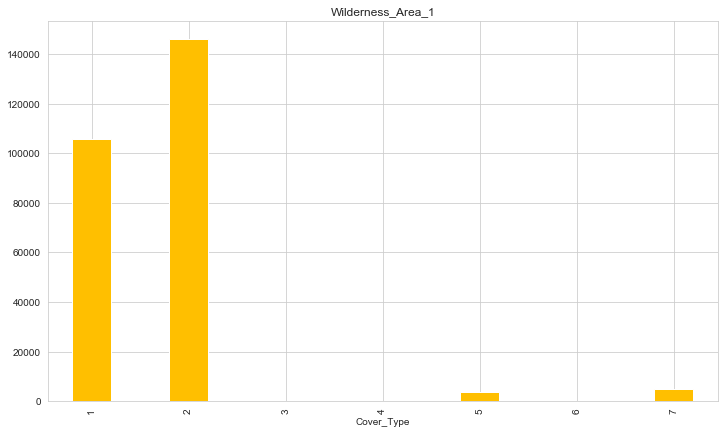

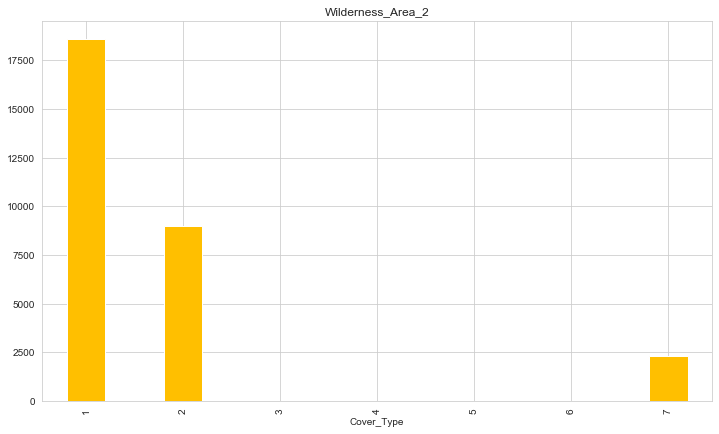

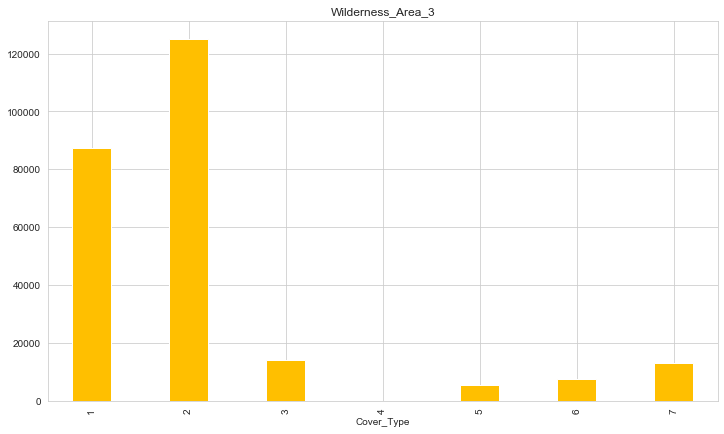

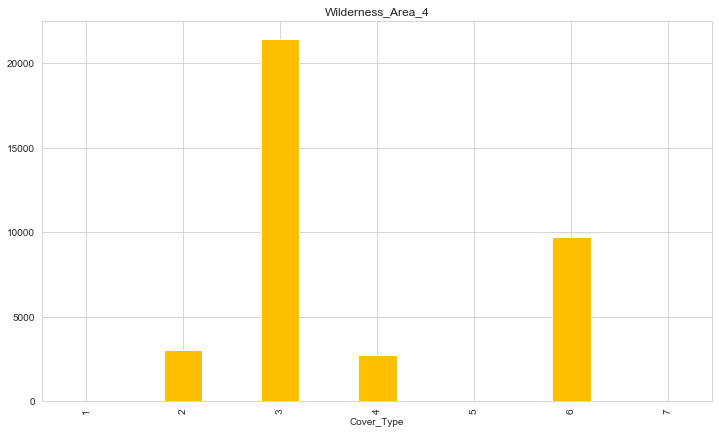

In [24]:
# define the columns that want to plot out
areas = ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
    
# using for loop to generate the graph
for i in range(len(areas)):
    
    # plot i number of graphs
    plt.figure(i, figsize=(12, 7))
 
    # group by each of the cover type and sum each of them
    df.groupby('Cover_Type')[areas[i]].sum().plot.bar(width = 0.4, color='#ffbf00')
    
    # display the title name
    plt.title(areas[i])

#### Findings:

(1) Most of the Cover Type 1 and 2 are grown in Wilderness_Area_1, Wilderness_Area_2 and Wilderness_Area_3. Only have few of the Cover Type 2 grow in Wilderness_Area_4.

(2) For Cover Type 3, it mainly distributes in Wilderness_Area_4 and got few distribute in Wilderness_Area_3.

(3) Very interesting finding is that for Cover Type 4 which only distribute in Wilderness_Area_4. Other Wilderness_Area do not exist any Cover Type 4 and the amount of Cover Type also less.

(4) For Cover Type 5, it only could be found in Wilderness_Area_1 and Wilderness_Area_3. The amount of Cover Type also less.

(5) Cover Type 6 mainly found in Wilderness_Area_4 and few could be found in Wilderness_Area_3

(7) For Cover Type 7, it could not be found only in Wilderness_Area_4 and the rest have the existence of Cover Type 7.

(8) In Wilderness_Area_3, we could find most of the Cover Types, except the Cover Type 4.

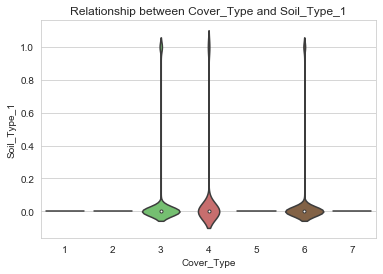

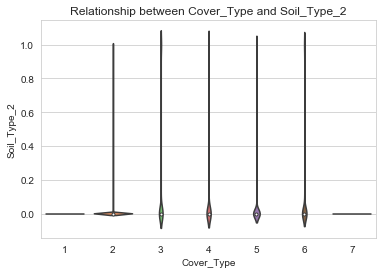

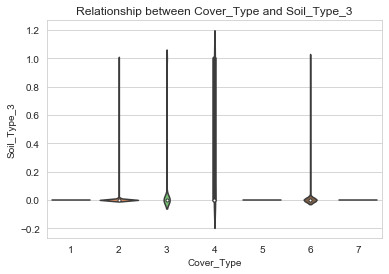

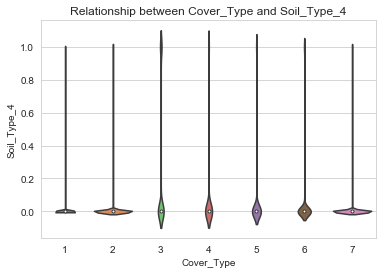

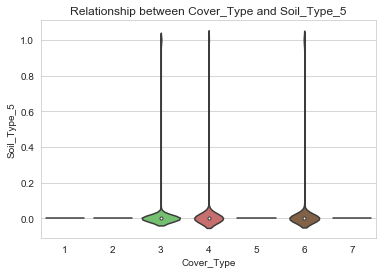

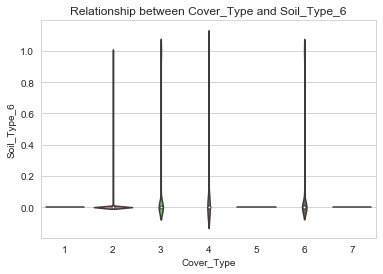

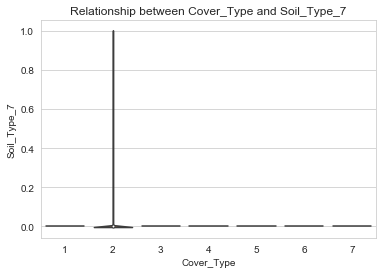

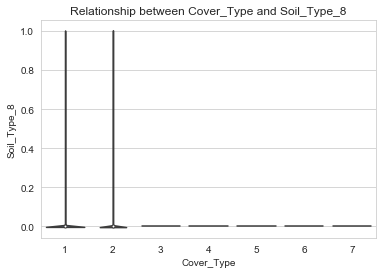

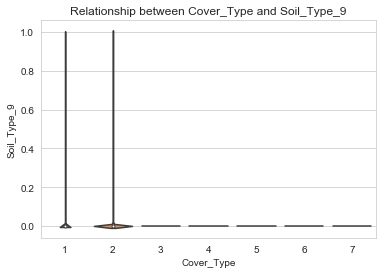

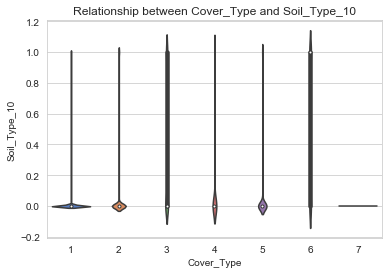

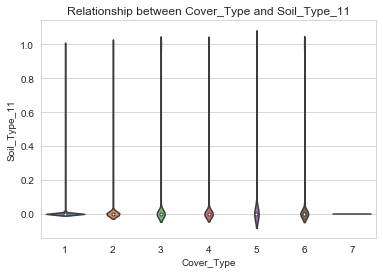

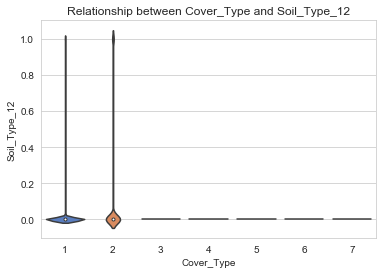

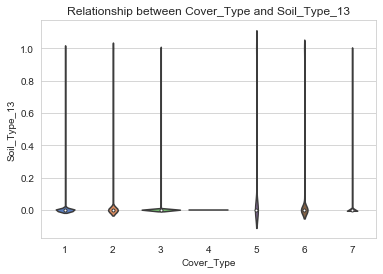

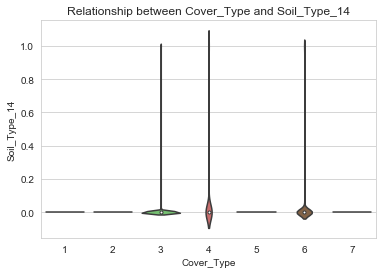

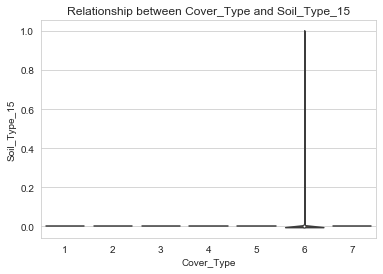

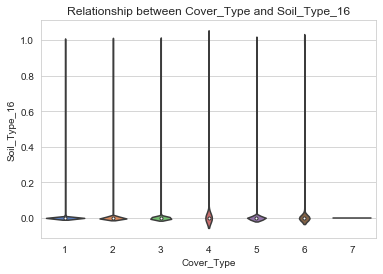

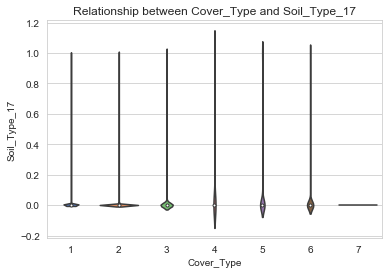

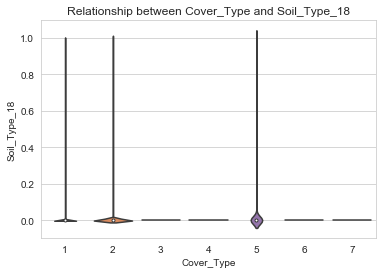

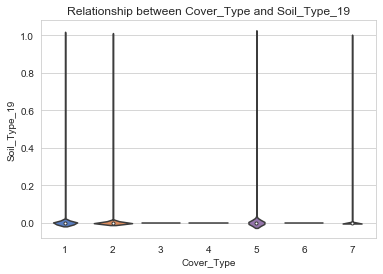

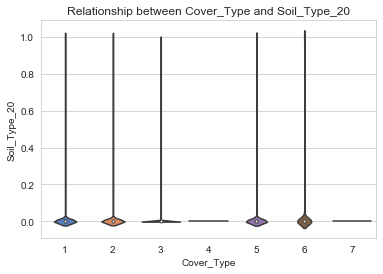

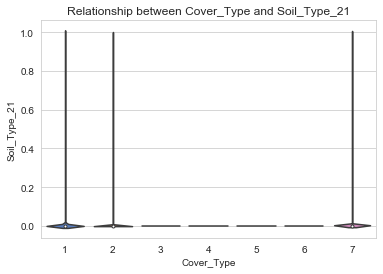

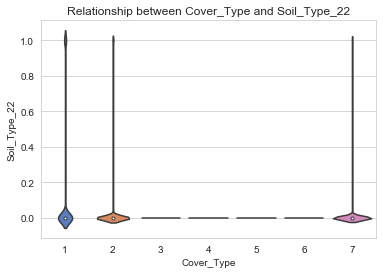

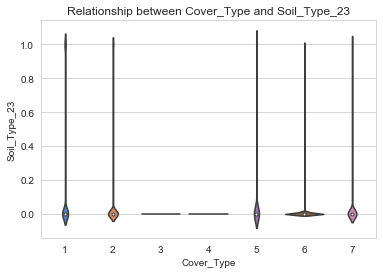

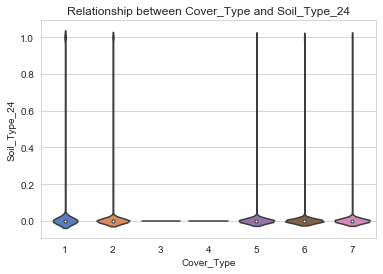

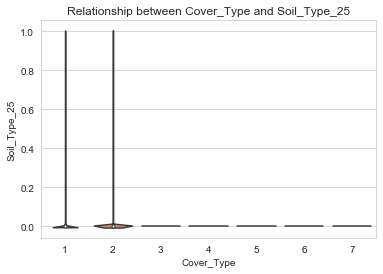

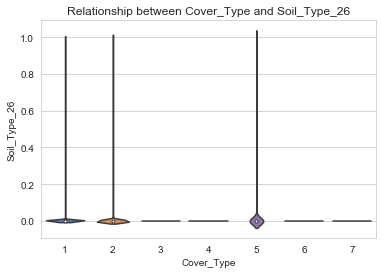

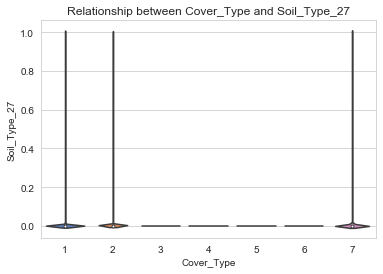

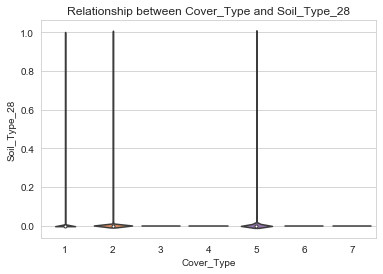

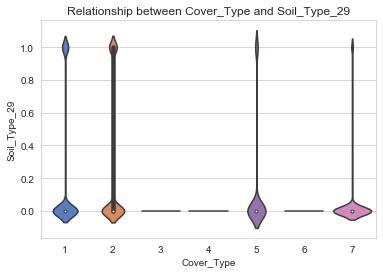

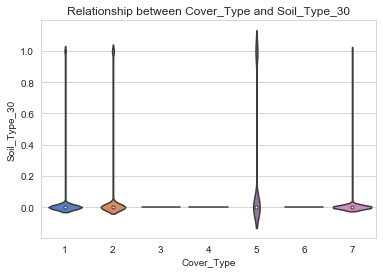

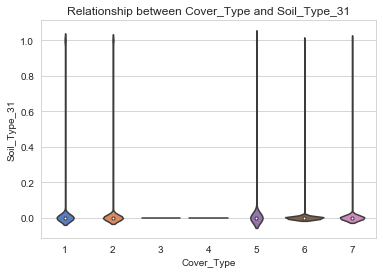

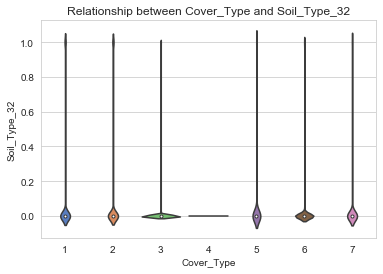

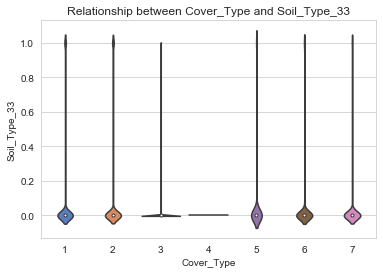

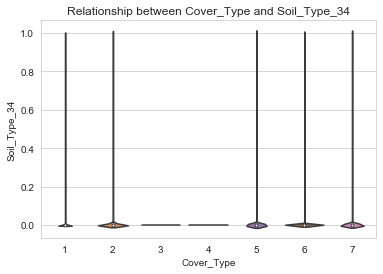

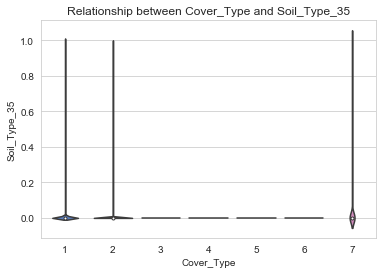

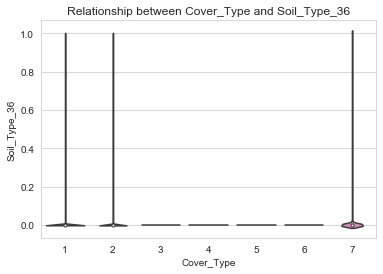

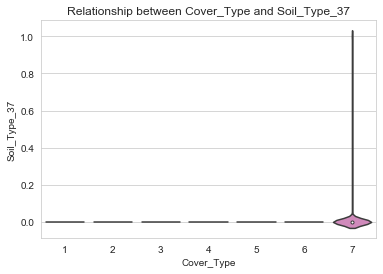

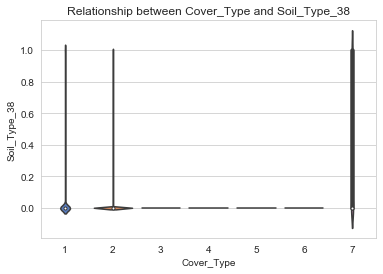

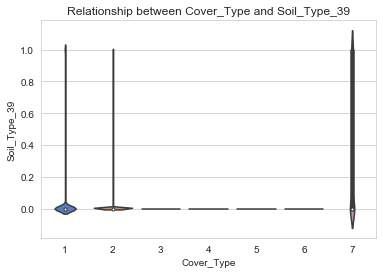

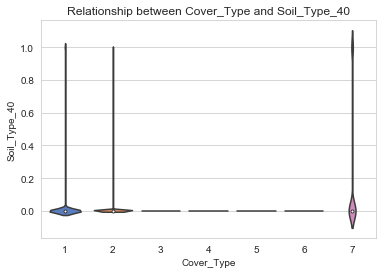

In [25]:
# get all the columns name
all_columns = df.columns

# eliminate th target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[14:eliminate_target]

# plot out the graph
for a in range(0, 40):
    sns.violinplot(data=df, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Cover_Type and Soil_Type_' + str(a+1))
    plt.show()

#### Findings:

(1) Based on the 40 violinplot graphes above, we can conclude that for Soil_Type 1, 5, 7, 8, 9, 12, 14, 15 18, 21, 22, 25-28 and 35-40 which have at least 4 Cover Types do not have any values.

### Prepare the data for machine learning algorithms

### We first check if the dataset consist of any missing values 

In [26]:
# Check any missing data for each columns
print(df.isnull().values.any())

False


#### Findings:

(1) It gives a False rusult which means that this dataframe does not consist any null values.

In [27]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.33, random_state=42)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us impore the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)


(389278, 54) (191734, 54)
(389278,) (191734,)


#### Findings:

(1) After we used StratifiedShuffleSplit to split the data, now the amount of training data becomes 389278 and the amount of testing data becomes 191734.

## 3 Clssification Models

### (1) Random Forest

In [28]:
# instantiate the RandomForestClassifier() model
rfc = RandomForestClassifier(n_estimators=150, max_depth=15, criterion='gini', random_state=42, n_jobs=-1)

# fit the model with X_train and y_train
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [29]:
# make prediction with X_test
y_pred = rfc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

0.8249449758519616


In [30]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rfc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.8424210975189967


#### Findings:
    
(1) Based on the above result, we can see that when I set the parameter for the Random Rorest Classifier (n_estimators=150, max_depth=15, criterion='gini', random_state=42, n_jobs=-1) which give us 82.49% when using testing set data to do prediction. While we use the model to predict the tranind data, it gives us 84.24%. It only has 1.75% difference which is not much differences and we can say that the model does not occur overfitting issue so that the model is good for predicting both training and testing data.

### Tuning the Random Forest model

In [ ]:
# instantiate the RandomForestClassifier model and set the random_state =  42 to make sure we can get the same result everytime
rdfc = RandomForestClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
rdfc_param = {
              'n_estimators':[100, 300, 500],
              "criterion": ["gini", "entropy"],
              'max_depth': [15, 17],
              'max_features':['auto', 'sqrt']
             }

# instantiate the gridsearchcv to get the hyperparameter
rdfc_gscv = GridSearchCV(estimator=rdfc, param_grid=rdfc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
rdfc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(rdfc_gscv.best_params_)

# print out the result
print(rdfc_gscv.best_score_)

In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rdfc_gscv.predict(X_train)

# check our models performance
print('Accuracy : ',metrics.accuracy_score(y_train, y_pred)*100 ,'%')

#### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 87.23% which compare with the accuracy 82.49% (without tuning) has a significant improvement of 5.84%.

(2) Next, the tuning model do a prediction of the testing set data is 87.23% and when predict the training data which get a result of 90.21%. It has only a 2.98% difference which does not occur the overfitting issue so that the model is good for predicting both training and testing data.

(3) Besides that, we can see that the max_depth in Random Forest Classifier has a huge impact. Since I set the max_depth = 15 when without tuning the model and it gives us 82.49%. However, when tuning the model, I set the max_depth in a range [15, 17] and it chose 17 which increase the accuracy to 87.23%. Therefore, we can conclude that the more number splits that each decision tree is allowed to make which get more information about the data. However, if we do not limit the max_depth of the tree which would occur a overfitting situation. Therefore, we need to try out different values of the max_depth to get the optimum result and avoid the overfitting.

(4) On the other hand, we notice that the n_estimors also has a huge affect on the model. Since in the model (without tuning), I set the n_estimors = 150 which give a 82.49%, but when tuning the model, I set the n_estimors in a range of [100, 300, 500] and the gridsearchcv took the maximun value which is 500 and the accuracy bacome 87.23%. Since we know that the n_estimors controls the number of tree inside the classifier and it might help us to generate a more generalized result but we need to try this case by case. Moreover, when I do tuning, it tooks more time to run this model as the gridsearchcv took a higher number of n_estimors as it generates more trees.

### (2) Naive Bayes Classifier

In [ ]:
# instantiate the GaussianNB() model
nbc = GaussianNB(var_smoothing=3e-9)

# fit the model with X_train and y_train
nbc.fit(X_train, y_train)

# make prediction with X_test
y_pred = nbc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))


In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

#### Findings:

(1) When I set the parameter for the GaussianNB as (var_smoothing=3e-9) which do a prediction on the testing data and it gives a accuracy 8.81%. When using this model to predict training set data, it gives a 8.79%. Both accuracy only have 0.02% diffence which is not much diffences so it does not occur overfitting issue.

### Tuning the Naive Bayes Classifier

In [ ]:
# instantiate the GaussianNB() model
nbc2 = GaussianNB()

# set the hyperparameters for the gridsearchcv to choose the best one
# use var_smoothing as the hyperparameter
params = {'var_smoothing': np.logspace(0,-9, num=50)}

# using gridsearchcv to get the best hyperparameter
nbc2_gscv = GridSearchCV(estimator=nbc2, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy') 

# fit the model with X_train and y_train
nbc2_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(nbc2_gscv.best_params_)

# print out the result
print(nbc2_gscv.best_score_)

In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc2_gscv.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

#### Findings：

After tuning the model:

(1) First, we can see that the accuracy becomes 46.79% which compare with the accuracy 8.81% (without tuning) has a significant improvement of 37.98%.

(2) Next, the tuning model do a prediction of the testing set data is 46.79% and when predict the training data which get a result of 46.08%. It has only a 0.71% difference which does not occur the overfitting issue.

(3) Since I set the parameter 'var_smoothing' in a larger range, and the gridsearchcv chose 1.0 as the best value for the model. Based on this result, we can conclude that the higher the 'var_smoothing' is, the accuracy become more higher also.

### (3) Decision Tree classifier

In [ ]:
# instantiate the DecisionTreeClassifier() model
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=13, random_state=42)

# fit the model with X_train and y_train
dtc.fit(X_train, y_train)

# make prediction with X_test
y_pred = dtc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

#### Findings:

(1) When I set the parameter for the Decision Tree Classifier as (criterion="entropy", max_depth=13, random_state=42) which do a prediction on the testing data and it gives a accuracy 82.32%. When using this model to predict training set data, it gives a 83.85%. Both accuracy only have 1.53% diffence which is not much diffences so it does not occur overfitting issue.

### Tuning the Decisioin Tree Classifier

In [ ]:
# tuning the Decision Tree model

# instantiate the DecisionTreeClassifier() model
dtc2 = DecisionTreeClassifier(random_state=42)

# set the hyperparameters for the gridsearchcv to choose the best one
dtc_param = { 
              "criterion": ["gini", "entropy"],
              "max_depth": [10, 13, 17],
              "min_samples_leaf": [1, 2, 3]
             }

# using gridsearchcv to get the best hyperparameter
dtc_gscv = GridSearchCV(estimator=dtc2, param_grid=dtc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
dtc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(dtc_gscv.best_params_)

# print out the result
print(dtc_gscv.best_score_)


In [ ]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc_gscv.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

#### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 87.66% which compare with the accuracy 82.32% (without tuning) has a significant improvement of 5.34%.

(2) Next, the tuning model do a prediction of the testing set data is 87.67% and when predict the training data which get a result of 91.28%. It has only a 3.61% difference which does not occur the overfitting issue so that the model is good for predicting both training and testing data.

(3) On the other hand, we notice that in the parameter criteria the gridsearchcv chose 'Entropy' to be the hyperparameter. 

(4) Besides that, we can see that the max_depth in Decision Tree Classifier has a huge impact. Since I set the max_depth = 13 when without tuning the model and it gives us 82.32%. However, when tuning the model, I set the max_depth in a range [10, 13, 17] and it chose 17 which increase the accuracy to 87.67%. Therefore, we can conclude that the more number splits that each decision tree is allowed to make which get more information about the data. However, if we do not limit the max_depth of the tree which would occur a overfitting situation. Therefore, we need to try out different values of the max_depth to get the optimum result and avoid the overfitting.

(5) Furthermore, I set the parameter min_samples_leaf in a range of [1, 2, 3] and the gridsearchcv chose to use 1 as the min_samples_leaf which give a better accuracy also.

#### Finding of comparing these 3 classification models above:
    
In this task, we have used Random Forest model, Naive Bayes Classifier model and Decisioin Tree Classifier model to solve the classification problem.

Among these 3 models, Random Forest model and Decisioin Tree Classifier model work quite well in this task. Both models get an approximately 82% and 87% before and after tuning the models.

Besides that, these 3 models do not have any underfitting and overfitting problems as I have showed above.

Howver, Naive Bayes Classifier model gives a poor result in solving the classification problem of this task even after tuning the model.


## User-Defined Transform functionality

In [ ]:
# define a class to generate a user-defined-transform function
class UserDefinedTransform(BaseEstimator, TransformerMixin):
    # initialize the constructor
    def __init__(self, elevation_lvl=True):
        self.elevation_lvl = elevation_lvl
    
    # define a fit function
    def fit(self, X, y=None):
        return self
    
    # define a transform function 
    def transform(self, X, y=None):
        # using if else statement to take different actions
        if self.elevation_lvl:
            
            # divide into the different elevation range and insert them into the columns called Elevation_Group
            df['Elevation_Level'] = pd.cut(df['Elevation'], 3, precision=0, labels=['1', '2', '3'])
            
            # insert the column Elevation_Group to the right position
            elevation_lvl = df.pop('Elevation_Level')
            df.insert(1, 'Elevation_Level', elevation_lvl)
            
            # retrun the result
            return np.c_[X, elevation_lvl]
        else:
            # alert the user if got any error to create a new feature
            return print("Please check the values of 'Elevation'")

#### Findings:

(1) We generate a new feature called 'Elevation_Level' since the feature 'Elevation' contains many different values and do not have a specific range for the models to do prediction.

(2) The new feature 'Elevation_Level' has categorize the Elevation values into 3 catrgories which has 1, 2 and 3 so that we can based on this new feature to see the elevation each Cover Type belong to low, median or high. But in our case, we use number instead of string to label the category.


In [ ]:
# show the original X.shape
X.shape

#### Findings:
    
(1) Before transform the new feature ('Elevation_Level'), X contains 581012 rows and 54 columns (exclude the target column).

In [ ]:
# create the class object and transfrom the new feature then show the shape of dataframe which excluding the target column
attr_adder = UserDefinedTransform(elevation_lvl=True)
attr_adder.transform(X).shape

#### Findings:

(1) After transform the new feature ('Elevation_Level'), X contains 581012 rows and 55 columns (exclude the target column).

In [ ]:
# displa the new feature 'Elevation_Level' in the dataframe
df['Elevation_Level']

In [ ]:
# plot out the graph to see the categories of the Elevation of each Cover_Type belongs to
plt.scatter(df['Cover_Type'], df['Elevation_Level'], c='red')

# set the graph title
plt.title('The categories of the Elevation of each Cover_Type belongs to')

# set the xlabel and ylabel
plt.xlabel('Cover_Type')
plt.ylabel('Elevation_Level')

# show the graph
plt.show()

#### Findings:

(1) Based on the graph above, we can see that most of the Cover Types are in Elevatioin_Level 1 and 2, except Cover Type 7 which does not appear any in Elevation_Level 1. Also, the elevation level of Cover Type 1 and 2 are average distribution which appear in all 3 elevation level 1, 2 and 3. 

(2) Next, we notice that only Cover Type 1, 2 and 7 have in Elevatioin_Level 3. Hence, we can conclude that Cover Type 3, 4, 5, and 6 do not grow in the elevation level 3 based on this dataset.